<h1 align="center"> QBraid's QuBes course </h1>
<h2 align="center"> Writing Quantum Programs </h1>
<h3 align="center"> Luka Nedimović </h1>

<hr/>

In [15]:
from qiskit import QuantumCircuit

<hr/>

<h2 align="center"> Free response </h2>

<h4> 1. What's wrong with this code? </h4>

In [ ]:
circ = QuantumCircuit(0) 

<h4> Answer: </h4> This code is trying to create a quantum circuit with <b> 0 qubits </b>, which means there are no qubits to manipulate. </b> 

<h4> 2. To write quantum programs, we made use of the QuantumCircuit class from the module qiskit. To use this code, we imported it as <i>from qiskit import QuantumCircuit</i>. <br><br>
Suppose instead that we used the statement <i>import qiskit</i>, exactly the way we said import numpy. How, then could we create an instance of the QuantumCircuit class? <br><br>
Write a simple QuantumCircuit using this method, and draw it to verify your code works. (Hint: You can look back at how we used numpy for guidance?) </h4>

In [16]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(1,1)

<h4> Solution: </h4>

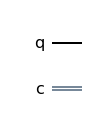

In [17]:
#copy the code from above using "import qiskit" as the import statement, then draw the circuit

import qiskit

#write circuit below:

circ = qiskit.QuantumCircuit(1,1)
circ.draw("mpl")

#finish circuit

<h4> 3. Create a QuantumCircuit with three qubits. Use a for loop to add a Hadamard to each gate. Draw the circuit to demonstrate that your code has worked correctly. </h4>

<h4> Solution: </h4>

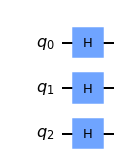

In [18]:
#write code below:

# QuantumCircuit is already imported

circ = QuantumCircuit(3)
circ.h(list(i for i in range(3)))

circ.draw("mpl")

<h4> The second solution that also works: </h4>

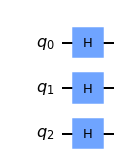

In [19]:
#write code below:

# QuantumCircuit is already imported

circ = QuantumCircuit(3)

for i in range(3):
    circ.h(i)
    
circ.draw("mpl")

<h4> 4. Initialize a QuantumCircuit and apply an X and Y gate on the first qubit. Now draw the circuit to verify your code works as expected. </h4>

<h4> Solution: </h4>

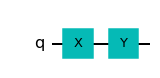

In [20]:
#write code below:

# QuantumCircuit is already imported

circ = QuantumCircuit(1)
circ.x(0)
circ.y(0)

circ.draw("mpl")

<h4> 5. One important skill in using external packages is reading coding documentation. This is all the information about how to use various pieces of code for a module. <br><br>
Go to https://qiskit.org/documentation/ and type in "Summary of Quantum Operations" in the search bar. <br>
This shows all the different possible gates that can be used and how they work mathematically. Scroll down until you find the T gate. <br><br>
How is this gate called using qiskit? (Note: Scrolling through documentation can be an extremely confusing process, especially for large modules. Remember that this process is like looking something up in the dictionary: you will come across many words you don't know until you find the one you are looking for!) </h4>

<h4> Solution: </h4>

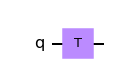

In [21]:
# QuantumCircuit is already imported

circ = QuantumCircuit(1)
circ.t(0) # The gate is simply called like other gates, such as H, Px, Py, Pz ... 

circ.draw("mpl") # Just to see the circuit ! :)

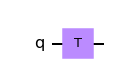

In [22]:
# There is another way of calling it: 

from qiskit.circuit.library import TGate # TGate 

circ = QuantumCircuit(1)
circ.append(TGate(), [0]) # Adding a T gate that acts on qubit 0

circ.draw("mpl") # The circuit is the same as the upper one ! :)

<hr>

<h3 align="center"> Challenge problems </h3>

 <h4> 1. (Statement of this problem is quite long and will not be included) </h4>

<h4> Solution a - "The box is empty": </h4>

In [23]:
from qiskit import QuantumCircuit, Aer, execute

#create QuantumCircuit
circ=QuantumCircuit(1,1)

#Code for CASE A

circ.h(0) # The first beamsplitter
circ.h(0) # The second beamsplitter

#measure
circ.measure([0],[0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

{'0': 1024}


<h4> Solution b - "The firework explodes upon being hit by the photon": </h4>

In [24]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import Reset

#create QuantumCircuit
circ=QuantumCircuit(1,1)

#Code for CASE B

circ.h(0) # The first beamsplitter
circ.measure([0],[0]) # The photon hits the firework
circ.append(Reset(), [0]) # Resseting the qubit to ensure it's in |0> state
circ.x(0) # Adding an X gate to flip |0> -> |1>
# We can think of this ending the circuit, since it hits the firework and the firework explodes, so we don't know what happens with the qubit afterwards

#measure
circ.measure([0],[0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

{'1': 1024}


<h4> Solution c - "The firework "chooses" the the upper path, leaving the firework unexploded." </h4>

In [25]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import Reset

#create QuantumCircuit
circ=QuantumCircuit(1,1)

#Code for CASE C

circ.h(0) # The first beamsplitter
circ.measure([0],[0]) # Measuring to check if the qubit took the upper path 
circ.append(Reset(), [0]) # Resetting the qubit to ensure it's in |0> state
circ.h(0) # The second beamsplitter

#measure
circ.measure([0],[0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

{'1': 540, '0': 484}


<h4> 2. Let's look at the code below and understand what it is showing us! </h4>

{'0': 526, '1': 498}
     ┌─────────┐┌───┐┌─┐
q_0: ┤ RY(π/2) ├┤ Z ├┤M├
     └─────────┘└───┘└╥┘
c: 1/═════════════════╩═
                      0 


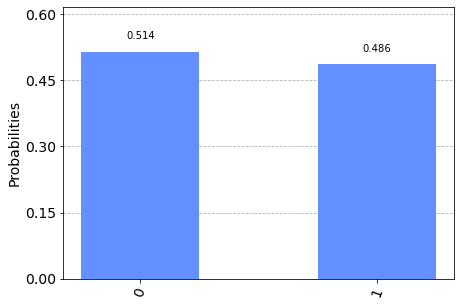

In [26]:
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
circ = QuantumCircuit(1,1)  #create QuantumCircuit object
### START CODE HERE ### (approx. 2 lines)
circ.ry(np.pi/2,0)
circ.z(0)
### END CODE HERE ###
circ.measure(0,0) #add a measurement to the circuit


backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)
print(circ.draw())
plot_histogram(counts)

<h5> a) Ignoring the small variance in the results. What are the probabilities for $|0\rangle$ and $|1\rangle$ ? </h5> 
<h4> Answer: </h4> The probabilities for $|0\rangle$ and $|1\rangle$ seem to be about 50% for each 

<h5> b) Write a qubit state which when measured would result in the above probabilites. </h5> 

<h4> Solution: </h4> 
Qubit state which when measured would result in the above probabilities could be $|+\rangle$ or $|-\rangle$ state: 
<div align="center"> 
$|+\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$ <br>
$|-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$
</div>

<h5> c) In the below code block, write a single qubit which would produce the same result! </h5>

<h4> Solution: </h4>

{'0': 512, '1': 512}
     ┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


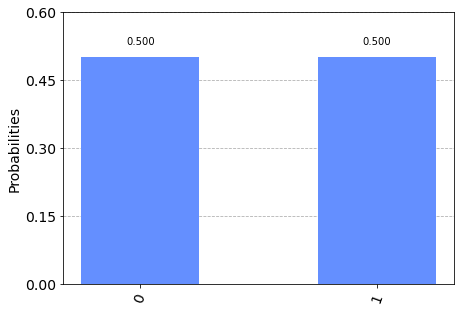

In [27]:
# QuantumCircuit is already imported

circ = QuantumCircuit(1,1)  #create QuantumCircuit object
# circ.x(0) # To get the |-> state, uncomment this line
circ.h(0)
circ.measure(0,0) #add a measurement to the circuit

# In case you want to simulate and draw it, uncomment following lines:

backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)
print(circ.draw())
plot_histogram(counts)

<hr>